In [1]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0))
!pip install pyvis

GPU Available: True
Number of GPUs: 2
GPU Name: Tesla T4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.7 MB/s eta 0:00:00:00:010:01


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import networkx as nx
import ast
import json
import matplotlib.pyplot as plt
from pyvis.network import Network
from multiprocessing import Pool
from itertools import combinations

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tripadvisor-european-restaurants/tripadvisor_european_restaurants.csv


In [3]:
# reading (csv) dataset via pandas

resturant_file="/kaggle/input/tripadvisor-european-restaurants/tripadvisor_european_restaurants.csv"
df=pd.read_csv(resturant_file, low_memory=False)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [4]:


# # Print columns
# print("Columns in dataset:", resturant_data.columns)

# # Calculate NaN percentage before imputation
# nan_percent_before = resturant_data.isna().mean() * 100
# # print(f"before data {nan_percent_before.sort_values(ascending=False)}")

# # Fill NaN values
# resturant_data['cuisines'] = resturant_data['cuisines'].fillna('[]')
# resturant_data['special_diets'] = resturant_data['special_diets'].fillna('[]')
# resturant_data['features'] = resturant_data['features'].fillna('[]')
# resturant_data['keywords'] = resturant_data['keywords'].fillna('')
# resturant_data['vegetarian_friendly'] = resturant_data['vegetarian_friendly'].fillna('No')
# resturant_data['vegan_options'] = resturant_data['vegan_options'].fillna('No')
# resturant_data['gluten_free'] = resturant_data['gluten_free'].fillna('No')
# resturant_data['avg_rating'] = resturant_data['avg_rating'].fillna(0)
# resturant_data['total_reviews_count'] = resturant_data['total_reviews_count'].fillna(0)
# resturant_data['city'] = resturant_data['city'].fillna('Unknown')
# resturant_data['country'] = resturant_data['country'].fillna('Unknown')

# # Parse list-like columns (convert string '[]' to actual lists)
# def parse_list(x):
#     if isinstance(x, str) and x.startswith('['):
#         return ast.literal_eval(x)
#     return x if isinstance(x, list) else []
    
# resturant_data['cuisines'] = resturant_data['cuisines'].apply(parse_list)
# resturant_data['special_diets'] = resturant_data['special_diets'].apply(parse_list)
# resturant_data['features'] = resturant_data['features'].apply(parse_list)

# # Calculate NaN percentage after imputation
# nan_percent_after = resturant_data.isna().mean() * 100
# # print(f"before data {nan_percent_after.sort_values(ascending=False)}")

# # Print before and after NaN percentages
# print("\nNaN Percentage Comparison:")
# print(f"{'Column':<30} {'Before (%)':>22} {'After (%)':>22}")
# print("-" * 55)
# for col in resturant_data.columns:
#     print(f"{col:<30} {nan_percent_before[col]:>12.2f} {nan_percent_after[col]:>12.2f}")

In [5]:
# # Analyze each column
# for col in df.columns:
#     print(f"Column: {col}")
#     print(f"Data Type: {df[col].dtype}")

#     # Check for unique values
#     unique_values = df[col].unique()
#     if len(unique_values) <= 10:
#         print(f"Unique Values: {unique_values}")
#     else:
#         print(f"First 10 Unique Values: {unique_values[:10]}")

#     # Check for list-like structures
#     sample_value = df[col].dropna().iloc[0] if not df[col].isnull().all() else None
#     if isinstance(sample_value, str) and "," in sample_value:
#         print("This column contains list-like structures (comma-separated values).")

#     # Check for missing values
#     missing_count = df[col].isnull().sum()
#     print(f"Missing Values: {missing_count} ({missing_count / len(df) * 100:.2f}%)")

df_isnull=df.isna().mean()*100

print("-" * 50)
print(df_isnull)



--------------------------------------------------
restaurant_link                       0.000000
restaurant_name                       0.000092
original_location                     0.000000
country                               0.000000
region                                4.644927
province                             31.441106
city                                 36.984134
address                               0.000000
latitude                              1.457453
longitude                             1.457453
claimed                               0.170021
awards                               75.712227
popularity_detailed                   8.767608
popularity_generic                    9.026423
top_tags                             10.211769
price_level                          25.586650
price_range                          71.909928
meals                                41.356031
cuisines                             15.608590
special_diets                        68.593600
features 

### Handle missing data in the dataset

In [6]:
# Handle location-related columns
df['province'] = df['province'].fillna("Unknown")
df['city'] = df['city'].fillna("Unknown")
df['address'] = df['address'].fillna("Unknown")

# Drop rows with missing latitude or longitude
df = df.dropna(subset=['latitude', 'longitude'])

print(df['province'].isnull().any())
print(df['city'].isnull().any())
print(df['address'].isnull().any())

False
False
False


In [7]:
#converting objects arrays to list 
def parse_list(x):
    if isinstance(x, str) and x.startswith('['):
        return ast.literal_eval(x)
    return x if isinstance(x, list) else []
    

In [8]:
# df['gluten_free'].dtype
print(df['special_diets'].isnull().any())

True


In [9]:
# Handle attributes/features
df['awards']=df['awards'].fillna("None")
df['popularity_detailed']=df['popularity_detailed'].fillna("None")
df['popularity_generic']=df['popularity_generic'].fillna("None")
df['top_tags']=df['top_tags'].fillna("None")
df['price_level']=df['price_level'].fillna("Unknown")
df['price_range']=df['price_range'].fillna("Unknown")

df['cuisines']=df['cuisines'].fillna('[]')
df['special_diets']=df['special_diets'].fillna('[]')
df['features']=df['features'].fillna('[]')
df['meals'] = df['meals'].fillna('[]')

# df['vegetarian_friendly'].fillna('No')
# df['vegan_options'].fillna('No')
# df['gluten_free'].fillna('No')
df['city']= df['city'].fillna('Unknown')


print(df['awards'].isnull().any())
print(df['popularity_detailed'].isnull().any())
print(df['popularity_generic'].isnull().any())
print(df['top_tags'].isnull().any())
print(df['price_level'].isnull().any())
print(df['price_range'].isnull().any())


# print(df['features'].dtype)

# Convert list-like columns to actual lists
list_columns = ['meals', 'cuisines', 'special_diets', 'features']
for col in list_columns:
    df[col].apply(parse_list)
    
    # df[col] = df[col].apply(lambda x:[] 
    #                         if isinstance(x, float) and np.isnan(x) else # Handle NaN/missing values
    #                         (x.split(", ") if isinstance(x, str) else  # Handle strings
    #                          list(x) if isinstance(x, (list, np.ndarray)) else  # Handle lists or arrays
    #                          [])
    #                        )
# print(df['features'].dtype)
# resturant_data['cuisines'] = resturant_data['cuisines'].apply(parse_list)
# resturant_data['special_diets'] = resturant_data['special_diets'].apply(parse_list)
# restur

False
False
False
False
False
False


In [10]:
print(df['special_diets'].isna().mean()*100)

0.0


In [11]:
# Handle numeric ratings/reviews
numeric_columns = [
    'avg_rating', 'total_reviews_count', 'reviews_count_in_default_language',
    'excellent', 'very_good', 'average', 'poor', 'terrible',
    'food', 'service', 'value', 'atmosphere'
]
for col in numeric_columns:
    df[col]=df[col].fillna(0)

# Handle categorical columns
df['default_language']= df['default_language'].fillna("Unknown")

In [12]:
# Function to parse JSON-like strings
def parse_open_hours(value):
    try:
        return json.loads(value) if isinstance(value, str) else {}
    except json.JSONDecodeError:
        return {}

# Apply the function to the column
df['original_open_hours'] = df['original_open_hours'].apply(parse_open_hours)

In [13]:
# Handle numeric operational details
numeric_operational_columns = ['open_days_per_week', 'open_hours_per_week', 'working_shifts_per_week']
for col in numeric_operational_columns:
    df[col] = df[col].fillna(0).astype(float)  # Fill missing values with 0 and ensure float type

In [14]:
# Boolean flags
boolean_columns = ['vegetarian_friendly', 'vegan_options', 'gluten_free']
for col in boolean_columns:
    df[col] = df[col].fillna(False)

In [15]:
# # # Convert valid strings to lists, handle arrays, and fill missing values with empty lists
df['keywords'] = df['keywords'].apply(
    lambda x: 
        [] if isinstance(x, float) and np.isnan(x) else  # Handle NaN/missing values
        (x.split(", ") if isinstance(x, str) else  # Handle strings
         list(x) if isinstance(x, (list, np.ndarray)) else  # Handle lists or arrays
         [])
)
# df['keywords']

In [16]:
# Fill missing value with "Unknown"
df['restaurant_name'] = df['restaurant_name'].fillna("Unknown")

# Fill missing values with "Unknown"
df['region'] = df['region'].fillna("Unknown")

# Fill missing values with "Unclaimed"
df['claimed'] = df['claimed'].fillna("Unclaimed")

In [17]:
# Verify the preprocessing
print("Are there any missing values after preprocessing?", df.isnull().any().any())
print(df['meals'][:10])

# Check for columns with missing values
missing_columns = []

for col in df.columns:
    if df[col].isnull().any():  # Check if any missing values exist in the column
        missing_count = df[col].isnull().sum()  # Count the number of missing values
        missing_percentage = (missing_count / len(df)) * 100  # Calculate percentage
        missing_columns.append((col, missing_count, missing_percentage))

# Print the columns with missing values
if missing_columns:
    print("Columns with missing values:")
    for col, count, percentage in missing_columns:
        print(f"Column: {col}, Missing Values: {count} ({percentage:.2f}%)")
else:
    print("No missing values found in any column.")

Are there any missing values after preprocessing? False
0                                 Lunch, Dinner
1                                            []
2                         Dinner, Lunch, Drinks
3                                 Lunch, Dinner
4                                 Lunch, Dinner
5                         Lunch, Dinner, Drinks
6                                 Lunch, Dinner
7                                            []
8                         Lunch, Dinner, Drinks
9    After-hours, Drinks, Lunch, Dinner, Brunch
Name: meals, dtype: object
No missing values found in any column.


In [18]:
print("\nRandom sample of 5 rows from the cleaned dataset:")
print(df.sample(5))


Random sample of 5 rows from the cleaned dataset:
          restaurant_link         restaurant_name  \
4929    g1079315-d4215001          A l'arbre vert   
821447  g2312160-d4747201          Pappa e Ciccia   
631973   g551706-d2103121           The Half Moon   
940846   g188666-d5871154           't Hoogtepunt   
924392  g1954056-d4262804  Kaffestugan Alunbruket   

                                        original_location  country     region  \
4929    ["Europe", "France", "Grand Est", "Haut-Rhin",...   France  Grand Est   
821447  ["Europe", "Italy", "Puglia", "Province of Tar...    Italy     Puglia   
631973  ["Europe", "United Kingdom (UK)", "England", "...  England     Dorset   
940846  ["Europe", "Belgium", "Flanders", "East Flande...  Belgium   Flanders   
924392  ["Europe", "Sweden", "Skane County", "Tomelill...   Sweden    Unknown   

                      province         city  \
4929                 Haut-Rhin  Pulversheim   
821447     Province of Taranto      Unknown   
63

In [19]:
# Save the cleaned dataset to a CSV file
output_file_path = "/kaggle/working/cleaned_restaurants_data.csv"
os.makedirs(os.path.dirname(output_file_path), exist_ok=True)

# Save the cleaned dataset to a CSV file
df.to_csv(output_file_path, index=False)


print(f"Cleaned dataset saved to: {output_file_path}")

Cleaned dataset saved to: /kaggle/working/cleaned_restaurants_data.csv


### Working on clean and preprocessed dataset

In [20]:
# reading a clean (csv) dataset via pandas


# Load dataset
# df = pd.read_csv('/kaggle/input/your_dataset.csv')  # Update path
print(f"Original dataset size: {len(df)}")

# Reduce to 
target_size = 5000 
reduced_df = df.sample(n=target_size, random_state=42)
print(f"Reduced dataset size: {len(reduced_df)}")

# Save reduced dataset
reduced_df.to_parquet('/kaggle/working/reduced_dataset.parquet')
print("Reduced dataset saved to /kaggle/working/reduced_dataset.parquet")

df = pd.read_parquet('/kaggle/working/reduced_dataset.parquet')
print(f"Reduced dataset size: {len(df)}")
# resturant_file="/kaggle/working/cleaned_restaurants_data.csv"
# df=pd.read_csv(resturant_file, low_memory=False)
df.head()

Original dataset size: 1067607
Reduced dataset size: 5000
Reduced dataset saved to /kaggle/working/reduced_dataset.parquet
Reduced dataset size: 5000


,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
91460,g1941566-d14779976,Auberge de Suzette,"[""Europe"", ""France"", ""Provence-Alpes-Cote d'Az...",France,Provence-Alpes-Cote d'Azur,Vaucluse,Suzette,"le Village, 84190 Suzette France",44.168070,5.068450,...,14.0,10.0,3.0,1.0,0.0,4.0,4.5,4.5,0.0,[]
701674,g187777-d7804595,punto pizza & più s.n.c,"[""Europe"", ""Italy"", ""Calabria"", ""Province of R...",Italy,Calabria,Province of Reggio Calabria,Unknown,"Via Stadio a Monte 19, 89129, Reggio Calabria ...",38.093260,15.636040,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
389450,g187497-d1906009,Bracafe,"[""Europe"", ""Spain"", ""Catalonia"", ""Province of ...",Spain,Catalonia,Province of Barcelona,Unknown,"Ronda Sant Antoni, 56, 08001 Barcelona Spain",41.381435,2.163539,...,4.0,8.0,1.0,1.0,2.0,3.0,3.5,3.0,3.0,[]
566304,g186540-d23285879,The Northern Point,"[""Europe"", ""United Kingdom (UK)"", ""Scotland"", ...",Scotland,Scottish Highlands,Caithness and Sutherland,John O'Groats,John O'Groats KW1 4YR Scotland,58.643696,-3.070416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
346212,g1189138-d12874794,Bar Torres,"[""Europe"", ""Spain"", ""Canary Islands"", ""Gran Ca...",Spain,Canary Islands,Gran Canaria,Santa Lucia de Tirajana,"Calle del Molino No 4, 35110 Santa Lucía de Ti...",27.845953,-15.466315,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]


### 1. Graph Construction
- Create an undirected graph where nodes are restaurants.
- Connect two nodes if they share at least one attribute: cuisine, special_diets, features, or are located in the same city.
- Store edge weights based on the number of shared features.

In [21]:
# Creating a graph based on restaurant name
# G= graph
G=nx.Graph()
# G.add_nodes_from(df['restaurant_name'])

# Add nodes with attributes
for index, row in df.iterrows():
    G.add_node(row['restaurant_name'], 
               city=row['city'], 
               cuisines=row['cuisines'], 
               special_diets=row['special_diets'], 
               features=row['features'])


In [22]:
# print("Nodes in G: ", (G.nodes(data=True)[:10]))
print(f"Number of nodes: {G.number_of_nodes()}")

for node, attrs in list(G.nodes(data=True))[:5]:
    print(f"Node: {node}, Attributes: {attrs}")

Number of nodes: 4846
Node: Auberge de Suzette, Attributes: {'city': 'Suzette', 'cuisines': 'French, Bar, Cafe, Diner', 'special_diets': '[]', 'features': 'Reservations, Seating, Table Service'}
Node: punto pizza &  più s.n.c, Attributes: {'city': 'Unknown', 'cuisines': 'Italian, Pizza', 'special_diets': '[]', 'features': '[]'}
Node: Bracafe, Attributes: {'city': 'Unknown', 'cuisines': 'Cafe, Spanish, European', 'special_diets': '[]', 'features': 'Outdoor Seating, Seating, Serves Alcohol, Wheelchair Accessible, Table Service'}
Node: The Northern Point, Attributes: {'city': "John O'Groats", 'cuisines': '[]', 'special_diets': '[]', 'features': '[]'}
Node: Bar Torres, Attributes: {'city': 'Santa Lucia de Tirajana', 'cuisines': 'American, Cajun & Creole, European, Spanish, Contemporary, Central European', 'special_diets': '[]', 'features': '[]'}


In [23]:
# # Add edges by city
# # print(df['special_diets'].dtype)
# # print("\nUnique special_diets values (sample):")
# # print(df['special_diets'].value_counts(dropna=False).head(10))

for city, group in df.groupby('city'):
    group = group.reset_index()
    print(f"Processing city: {city}, {len(group)} restaurants")
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            row1 = group.iloc[i]
            row2 = group.iloc[j]
            shared = 0
            
            # Checking  the shared attributes
            if set(row1['cuisines']) & set(row2['cuisines']):
                shared += 1
            if set(row1['special_diets']) & set(row2['special_diets']):
                shared += 1
            if set(row1['features']) & set(row2['features']):
                shared += 1
            if row1['city'] == row2['city']:
                shared += 1
            if shared > 0:
                G.add_edge(row1['restaurant_name'], row2['restaurant_name'], weight=shared)


# Function to process edges for a city group
# def process_city_group(city_group):
#     city, group = city_group
#     group = group.reset_index()
#     edges = []
#     print(f"Processing city: {city}, {len(group)} restaurants")
#     for i, j in combinations(range(len(group)), 2):
#         row1 = group.iloc[i]
#         row2 = group.iloc[j]
#         shared = 0
#         if set(row1['cuisines']) & set(row2['cuisines']):
#             shared += 1
#         if set(row1['special_diets']) & set(row2['special_diets']):
#             shared += 1
#         if set(row1['features']) & set(row2['features']):
#             shared += 1
#         if row1['city'] == row2['city']:
#             shared += 1
#         if shared > 0:
#             edges.append((row1['restaurant_name'], row2['restaurant_name'], {'weight': shared}))
#     return edges

# # Parallelize edge creation
# with Pool() as pool:
#     city_groups = [(city, group) for city, group in df.groupby('city')]
#     results = pool.map(process_city_group, city_groups)
#     for edges in results:
#         G.add_edges_from(edges)


Processing city: Aachen, 2 restaurants
Processing city: Aalborg, 2 restaurants
Processing city: Aalen, 1 restaurants
Processing city: Aarhus, 3 restaurants
Processing city: Abbeyfeale, 1 restaurants
Processing city: Aberdeen, 1 restaurants
Processing city: Absdorf, 1 restaurants
Processing city: Addlestone, 1 restaurants
Processing city: Admont, 1 restaurants
Processing city: Aegina, 1 restaurants
Processing city: Agaete, 1 restaurants
Processing city: Agen, 1 restaurants
Processing city: Agia Galini, 2 restaurants
Processing city: Agia Marina, 1 restaurants
Processing city: Agia Pelagia, 1 restaurants
Processing city: Agia Triada, 1 restaurants
Processing city: Agios Ioannis Rentis, 1 restaurants
Processing city: Agria, 1 restaurants
Processing city: Ahaus, 1 restaurants
Processing city: Ahrensburg, 1 restaurants
Processing city: Aigues-Mortes, 1 restaurants
Processing city: Aiguines, 1 restaurants
Processing city: Airdrie, 1 restaurants
Processing city: Aire-sur-l'Adour, 1 restaurant

In [24]:
# Verify
print(f"Edges added: {G.number_of_edges()}")
print(f"Sample edges: {list(G.edges(data=True))[:5]}")

# # Verify
# print(f"Edges added: {G.number_of_edges()}")
# print(f"Sample edges with weights: {list(G.edges(data=True))[:5]}")

# Save graph
# nx.write_gml(G, 'restaurant_graph.gml')

Edges added: 1642024
Sample edges: [('punto pizza &  più s.n.c', 'Bracafe', {'weight': 3}), ('punto pizza &  più s.n.c', 'Sapa Sushi', {'weight': 3}), ('punto pizza &  più s.n.c', 'Bar Sport Paola', {'weight': 4}), ('punto pizza &  più s.n.c', 'Portonovo Silvestre', {'weight': 2}), ('punto pizza &  più s.n.c', 'Come Prima ammare', {'weight': 4})]


Saved graph and DataFrame to /kaggle/working/
Sampled graph: 1000 nodes, 81794 edges
/kaggle/working/restaurant_graph_sampled.html
Sampled visualization saved to /kaggle/working/restaurant_graph_sampled.html


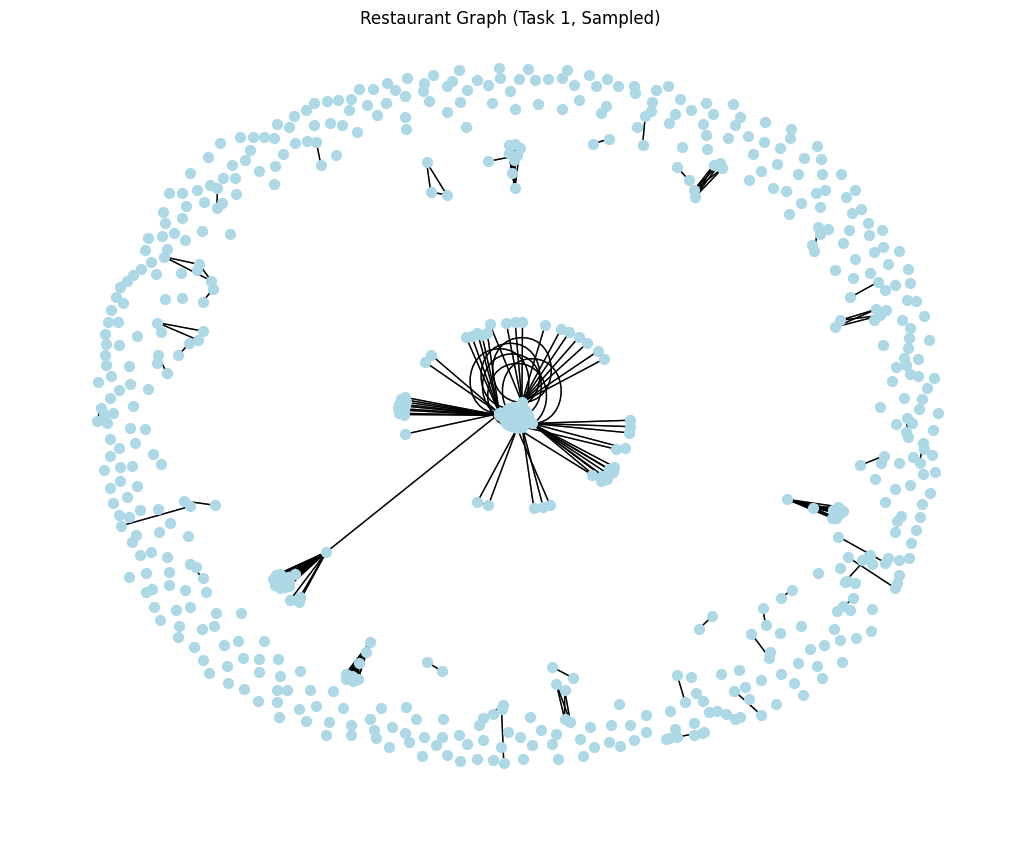

Matplotlib visualization displayed


In [27]:
# Save session data
nx.write_gml(G, '/kaggle/working/restaurant_graph.gml')
df.to_parquet('/kaggle/working/processed_df.parquet')
print("Saved graph and DataFrame to /kaggle/working/")

# Step 3: Visualize with PyVis (sampled subgraph)
# Sample 1000 nodes for visualization
sampled_nodes = list(G.nodes())[:1000]
G_sampled = G.subgraph(sampled_nodes)
print(f"Sampled graph: {G_sampled.number_of_nodes()} nodes, {G_sampled.number_of_edges()} edges")

# net = Network(notebook=True, height="500px", width="100%", directed=False, cdn_resources='in_line')
# net.from_nx(G_sampled)
# for node in G_sampled.nodes():
#     net.get_node(node)['label'] = node
# # for edge in G_sampled.edges(data=True):
# #     net.get_edge(edge[0], edge[1])['value'] = edge[2]['weight']

# for edge in G_sampled.edges(data=True):
#     weight = edge[2].get('weight', 1)  # Default to 1 if no weight
#     net.nx.get_edge_attributes(edge[0], edge[1])['value'] = weight

# net.show("/kaggle/working/restaurant_graph_sampled.html")
# print("Sampled visualization saved to /kaggle/working/restaurant_graph_sampled.html")


for u, v, data in G_sampled.edges(data=True):
    data['value'] = data.get('weight', 1)

# Now create the PyVis network from the modified graph
net = Network(notebook=True, height="500px", width="100%", directed=False, cdn_resources='in_line')
net.from_nx(G_sampled)

# Optional: Add labels to nodes
for node in G_sampled.nodes():
    net.get_node(node)['label'] = node

# Save and display
net.show("/kaggle/working/restaurant_graph_sampled.html")
print("Sampled visualization saved to /kaggle/working/restaurant_graph_sampled.html")




# Step 4: Alternative Matplotlib visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_sampled, k=0.1)
nx.draw(G_sampled, pos, node_size=50, node_color='lightblue', with_labels=False)
nx.draw_networkx_edges(G_sampled, pos, alpha=0.5)
plt.title("Restaurant Graph (Task 1, Sampled)")
plt.show()
print("Matplotlib visualization displayed")

Matplotlib visualization displayed


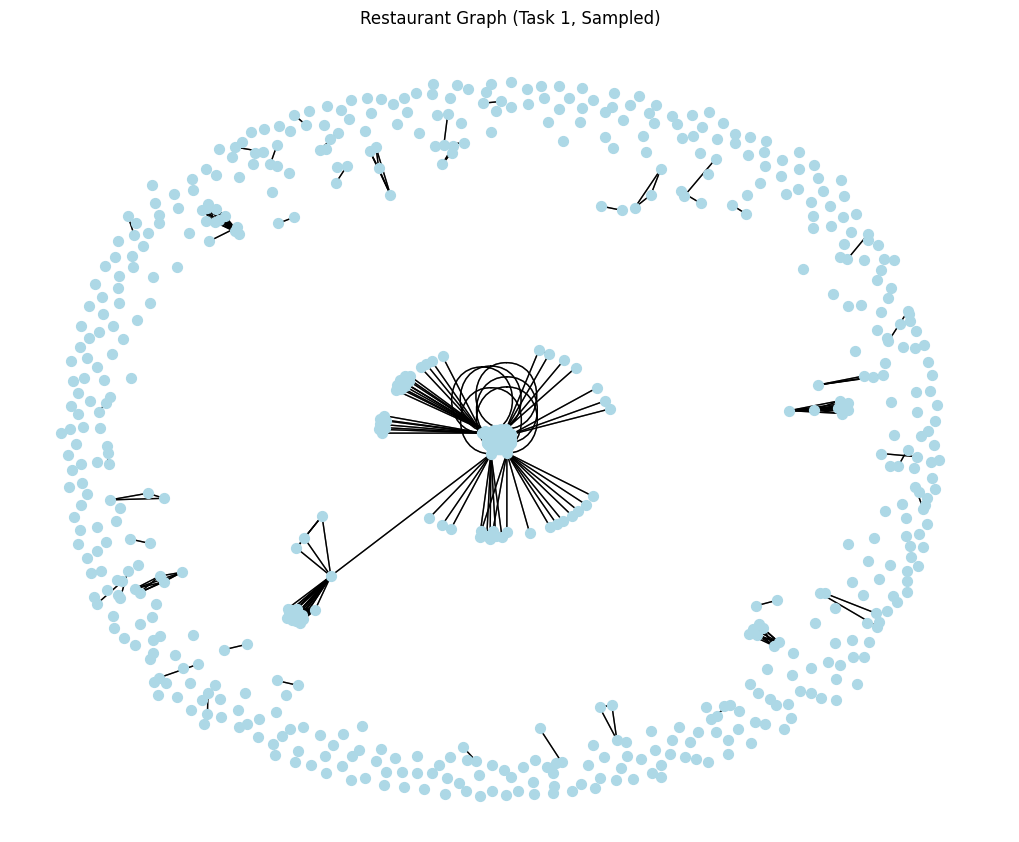

In [31]:
# Step 4: Alternative Matplotlib visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_sampled, k=0.1)
nx.draw(G_sampled, pos, node_size=50, node_color='lightblue', with_labels=False)
nx.draw_networkx_edges(G_sampled, pos, alpha=0.5)
plt.title("Restaurant Graph (Task 1, Sampled)")
# plt.show()
print("Matplotlib visualization displayed")
plt.savefig('/kaggle/working/task1graph.png')
plt.show()

### 2. Task
## Weighted Network Creation

- Extend the graph by calculating a similarity score between restaurants using shared tags and geographic proximity **(Haversine distance for <5 km)**.
- Use this score to define weighted edges.

In [32]:

### just for clarity

# Load reduced dataset
df = pd.read_parquet('/kaggle/working/processed_df.parquet')  # or '/kaggle/working/reduced_dataset.parquet'
print(f"Loaded dataset size: {len(df)}")

Loaded dataset size: 5000


In [34]:
# Haversine distance function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c


In [35]:



# Check latitude/longitude
print("Missing lat/lon:", df[['latitude', 'longitude']].isna().sum())

# Drop rows with missing lat/lon
df = df.dropna(subset=['latitude', 'longitude'])
print(f"Dataset size after dropping missing lat/lon: {len(df)}")

# # Fix data
# def parse_list(x):
#     if pd.isna(x):
#         return []
#     if isinstance(x, str) and x.startswith('['):
#         return ast.literal_eval(x)
#     return x if isinstance(x, list) else []

# df['cuisines'] = df['cuisines'].fillna('[]').apply(parse_list)
# df['special_diets'] = df['special_diets'].fillna('[]').apply(parse_list)
# df['features'] = df['features'].fillna('[]').apply(parse_list)

# Verify data
print("Data types:", df[['cuisines', 'special_diets', 'features']].dtypes)
print("Sample data:", df[['cuisines', 'special_diets', 'features']].head())



Missing lat/lon: latitude     0
longitude    0
dtype: int64
Dataset size after dropping missing lat/lon: 5000
Data types: cuisines         object
special_diets    object
features         object
dtype: object
Sample data:                                                  cuisines special_diets  \
91460                            French, Bar, Cafe, Diner            []   
701674                                     Italian, Pizza            []   
389450                            Cafe, Spanish, European            []   
566304                                                 []            []   
346212  American, Cajun & Creole, European, Spanish, C...            []   

                                                 features  
91460                Reservations, Seating, Table Service  
701674                                                 []  
389450  Outdoor Seating, Seating, Serves Alcohol, Whee...  
566304                                                 []  
346212                      

In [36]:
# Create new graph
G_task2 = nx.Graph()

# Add nodes (same as Task 1)
for index, row in df.iterrows():
    G_task2.add_node(row['restaurant_name'], 
                     city=row['city'], 
                     cuisines=row['cuisines'], 
                     special_diets=row['special_diets'], 
                     features=row['features'], 
                     latitude=row['latitude'], 
                     longitude=row['longitude'])
print(f"Nodes added: {G_task2.number_of_nodes()}")




Nodes added: 4846


In [37]:
# Process edges with similarity score
def process_city_group(city_group):
    city, group = city_group
    group = group.reset_index()
    edges = []
    print(f"Processing city: {city}, {len(group)} restaurants")
    for i, j in combinations(range(len(group)), 2):
        row1 = group.iloc[i]
        row2 = group.iloc[j]
        
        # Calculate Haversine distance
        distance = haversine(row1['latitude'], row1['longitude'], 
                            row2['latitude'], row2['longitude'])
        
        # Only include pairs <5 km
        if distance < 5:
            # Shared tags
            shared = 0
            if set(row1['cuisines']) & set(row2['cuisines']):
                shared += 1
            if set(row1['special_diets']) & set(row2['special_diets']):
                shared += 1
            if set(row1['features']) & set(row2['features']):
                shared += 1
            
            # Proximity score (normalize distance: closer = higher score)
            proximity = 1 / (1 + distance)  # 0 to 1, higher when closer
            
            # Similarity score (weighted sum)
            score = shared + proximity  # Adjust weights if needed
            
            if score > 0:
                edges.append((row1['restaurant_name'], row2['restaurant_name'], {'weight': score}))
    
    return edges

# Parallelize
with Pool() as pool:
    city_groups = [(city, group) for city, group in df.groupby('city')]
    results = pool.map(process_city_group, city_groups)
    for edges in results:
        G_task2.add_edges_from(edges)


Processing city: Aachen, 2 restaurants
Processing city: Bad Kreuznach, 1 restaurants
Processing city: Bad Langensalza, 1 restaurants
Processing city: Bad Lausick, 1 restaurantsProcessing city: Aalborg, 2 restaurants
Processing city: Bad Mergentheim, 1 restaurants

Processing city: Aalen, 1 restaurants
Processing city: Bad Neustadt an der Saale, 1 restaurantsProcessing city: Breda, 2 restaurantsProcessing city: Aarhus, 3 restaurants

Processing city: Bad Rappenau, 2 restaurants

Processing city: Abbeyfeale, 1 restaurants
Processing city: Breil-sur-Roya, 1 restaurantsProcessing city: Bad Salzungen, 1 restaurantsProcessing city: Aberdeen, 1 restaurants


Processing city: Bremen, 3 restaurants
Processing city: Bad Sassendorf, 1 restaurantsProcessing city: Absdorf, 1 restaurants

Processing city: Chios, 1 restaurantsProcessing city: Brentwood, 1 restaurants
Processing city: Bad Soden-Salmunster, 2 restaurantsProcessing city: Addlestone, 1 restaurantsProcessing city: Bressuire, 1 restaurants

In [38]:
# Verify
print(f"Edges added: {G_task2.number_of_edges()}")
print(f"Sample edges: {list(G_task2.edges(data=True))[:5]}")

# Save session data
nx.write_gml(G_task2, '/kaggle/working/task2_graph.gml')
df.to_parquet('/kaggle/working/task2_df.parquet')
print("Saved Task 2 graph and DataFrame to /kaggle/working/")



Edges added: 11238
Sample edges: [('Bracafe', 'Portonovo Silvestre', {'weight': 2.3936314375573864}), ('Bracafe', 'Parallel Central', {'weight': 1.5686178095758478}), ('Bracafe', 'La Cocina De Graciela', {'weight': 1.2360334465980918}), ('Bracafe', 'Doner Kebab Baribar', {'weight': 2.4168269104641458}), ('Bracafe', 'Lamun Cuina Thai', {'weight': 1.6593874337288441})]
Saved Task 2 graph and DataFrame to /kaggle/working/


In [40]:
# Visualize sampled subgraph
sampled_nodes = list(G_task2.nodes())[:1000]
G_sampled = G_task2.subgraph(sampled_nodes)
print(f"Sampled graph: {G_sampled.number_of_nodes()} nodes, {G_sampled.number_of_edges()} edges")

# net = Network(notebook=True, height="500px", width="100%", directed=False, cdn_resources='in_line')
# net.from_nx(G_sampled)
# for node in G_sampled.nodes():
#     net.get_node(node)['label'] = node
# for edge in G_sampled.edges(data=True):
#     net.get_edge(edge[0], edge[1])['value'] = edge[2]['weight']

for u, v, data in G_sampled.edges(data=True):
    data['value'] = data.get('weight', 1)

# Now create the PyVis network from the modified graph
net = Network(notebook=True, height="500px", width="100%", directed=False, cdn_resources='in_line')
net.from_nx(G_sampled)

# Optional: Add labels to nodes
for node in G_sampled.nodes():
    net.get_node(node)['label'] = node


net.show("/kaggle/working/task2_graph.html")
print("Visualization saved to /kaggle/working/task2_graph.html")




Sampled graph: 1000 nodes, 526 edges
/kaggle/working/task2_graph.html
Visualization saved to /kaggle/working/task2_graph.html


Matplotlib visualization displayed


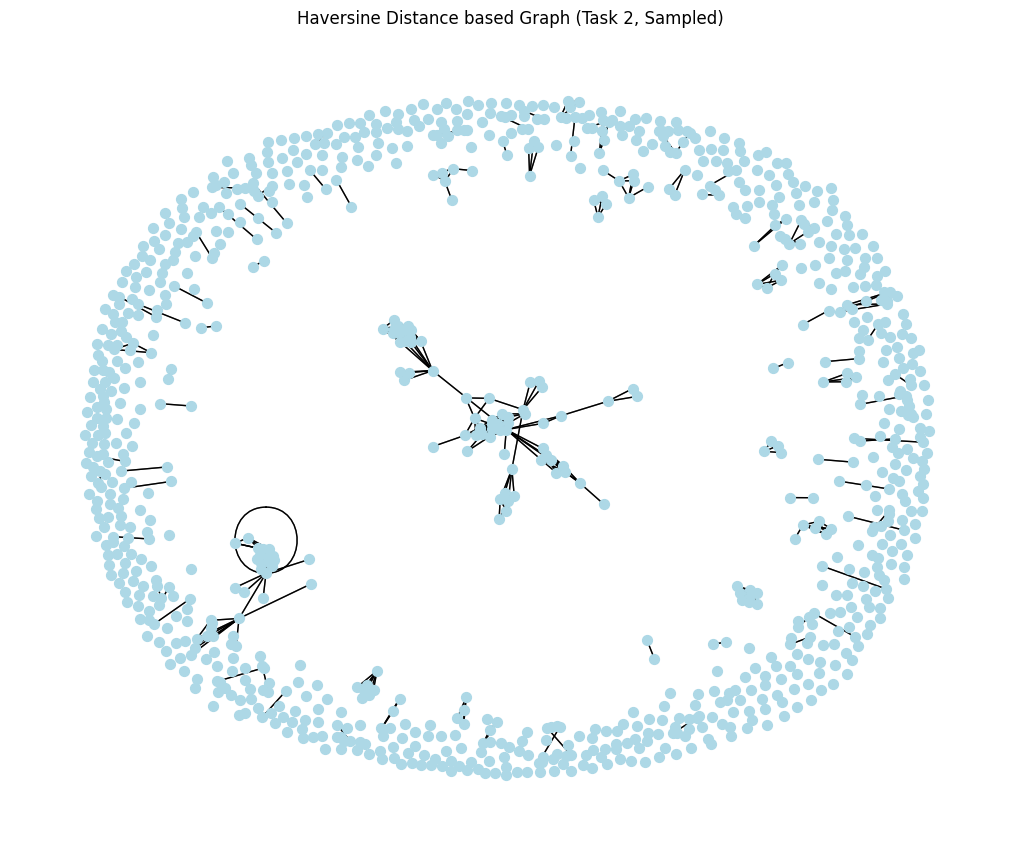

In [42]:
# Step 4: Alternative Matplotlib visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_sampled, k=0.1)
nx.draw(G_sampled, pos, node_size=50, node_color='lightblue', with_labels=False)
nx.draw_networkx_edges(G_sampled, pos, alpha=0.5)
plt.title("Haversine Distance based Graph (Task 2, Sampled)")
# plt.show()
print("Matplotlib visualization displayed")
plt.savefig('/kaggle/working/task2_graph.png')
plt.show()

### 3. Task
Degree and Strength Analysis

- Compute and compare degree and weighted degree (node strength).
- Analyze which restaurants are the most "connected" and why.

pesudo steps for task 3


- Loads the Task 2 graph (task2_graph.gml) and DataFrame (task2_df.parquet).
- Computes degree and weighted degree (node strength).
- Ranks and compares top restaurants.
- Analyzes attributes of the most connected restaurants.
- Visualizes with Matplotlib (bar plots) and PyVis (subgraph).
- Saves results (CSV, visualizations, graph).

In [45]:
# Load Task 2 graph and DataFrame
G = nx.read_gml('/kaggle/working/task2_graph.gml')
df = pd.read_parquet('/kaggle/working/task2_df.parquet')
print(f"Loaded graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"Loaded DataFrame: {len(df)} rows")

Loaded graph: 4846 nodes, 11238 edges
Loaded DataFrame: 5000 rows


In [47]:
# Step 1: Compute degree and weighted degree (node strength)
degree_dict = dict(G.degree())
strength_dict = dict(G.degree(weight='weight'))


# Create DataFrame for analysis
analysis_df = pd.DataFrame({
    'restaurant_name': list(degree_dict.keys()),
    'degree': list(degree_dict.values()),
    'strength': list(strength_dict.values())
})

# Merge with original DataFrame for attributes
analysis_df = analysis_df.merge(
    df[['restaurant_name', 'city', 'cuisines', 'special_diets', 'features', 'latitude', 'longitude']],
    on='restaurant_name',
    how='left'
)



In [60]:
# Step 2: Rank top restaurants
top_degree = analysis_df.sort_values('degree', ascending=False).head(20)
top_strength = analysis_df.sort_values('strength', ascending=False).head(20)

print("\nTop 10 Restaurants by Degree:")
print(top_degree[['restaurant_name', 'degree', 'city', 'cuisines']])

print("\nTop 10 Restaurants by Strength:")
print(top_strength[['restaurant_name', 'strength', 'city', 'cuisines']])


Top 10 Restaurants by Degree:
     restaurant_name  degree                    city  \
1456   Pret a Manger      81                 Unknown   
1457   Pret a Manger      81                 Unknown   
1455   Pret a Manger      81                   Paris   
1449             KFC      78                   Paris   
1452             KFC      78              Wateringen   
1451             KFC      78  Saint Brice Sous Foret   
1450             KFC      78              Manchester   
1447             KFC      78                 Unknown   
1446             KFC      78                 Unknown   
1448             KFC      78                 Unknown   
65        McDonald's      75        Chasse-sur-Rhone   
48        McDonald's      75                  Vienna   
64        McDonald's      75             Hoppegarten   
54        McDonald's      75                  Loches   
51        McDonald's      75                Rennerod   
52        McDonald's      75                Llanelli   
53        McDonal

In [61]:
# Step 3: Analyze why highly connected
print("\nAnalysis of Top Restaurants:")
for _, row in top_degree.head(10).iterrows():
    print(f"\nRestaurant: {row['restaurant_name']}")
    print(f"Degree: {row['degree']}, Strength: {row['strength']}")
    print(f"City: {row['city']}")
    print(f"Cuisines: {row['cuisines']}")
    print(f"Special Diets: {row['special_diets']}")
    print(f"Features: {row['features']}")
    print(f"Location: ({row['latitude']}, {row['longitude']})")
    print("Why Connected: Likely in a dense urban area with popular or diverse cuisines, connecting to many nearby restaurants.")

for _, row in top_strength.head(10).iterrows():
    print(f"\nRestaurant: {row['restaurant_name']}")
    print(f"Degree: {row['degree']}, Strength: {row['strength']}")
    print(f"City: {row['city']}")
    print(f"Cuisines: {row['cuisines']}")
    print(f"Special Diets: {row['special_diets']}")
    print(f"Features: {row['features']}")
    print(f"Location: ({row['latitude']}, {row['longitude']})")
    print("Why Connected: Strong connections due to many shared tags and/or very close proximity to similar restaurants.")



Analysis of Top Restaurants:

Restaurant: Pret a Manger
Degree: 81, Strength: 125.51608106089593
City: Unknown
Cuisines: Cafe, Fast food, British
Special Diets: Vegetarian Friendly, Vegan Options, Gluten Free Options
Features: []
Location: (51.52756, -0.133233)
Why Connected: Likely in a dense urban area with popular or diverse cuisines, connecting to many nearby restaurants.

Restaurant: Pret a Manger
Degree: 81, Strength: 125.51608106089593
City: Unknown
Cuisines: []
Special Diets: []
Features: []
Location: (51.51212, -0.079606)
Why Connected: Likely in a dense urban area with popular or diverse cuisines, connecting to many nearby restaurants.

Restaurant: Pret a Manger
Degree: 81, Strength: 125.51608106089593
City: Paris
Cuisines: []
Special Diets: Vegetarian Friendly, Vegan Options
Features: Takeout, Seating, Wheelchair Accessible
Location: (48.83064, 2.377304)
Why Connected: Likely in a dense urban area with popular or diverse cuisines, connecting to many nearby restaurants.

Res

In [62]:
top_nodes = list(set(top_degree['restaurant_name'].head(20)).union(top_strength['restaurant_name'].head(20)))

print(top_nodes)

['La pointe Drouot', "L'Envers", 'Pret a Manger', 'illy', "McDonald's", 'Cercle Cadet', "Les P'tites Poules", 'Saigon Vietnam', 'KFC', 'Cinco Jotas', 'Malibu African Food', 'Juste Le Zinc', 'Hanano', 'Nagoya', 'La Brigade Sentier', 'McCafe']


Bar plots saved to /kaggle/working/task3_bar_plots.png


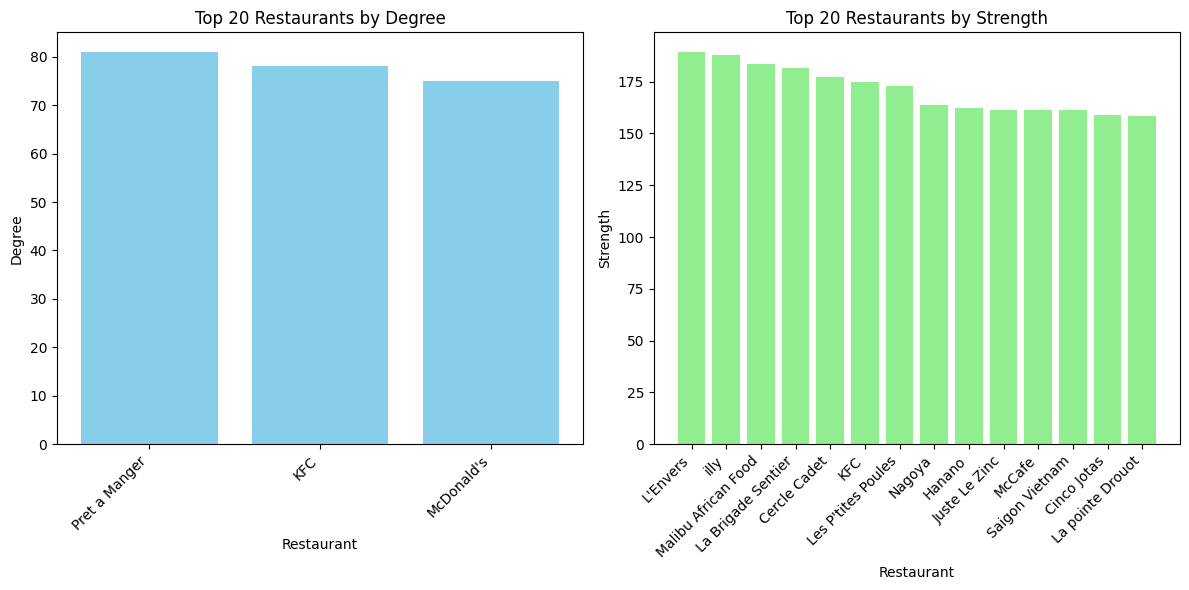

In [64]:



# Step 4: Visualize degree vs. strength
plt.figure(figsize=(12, 6))

# Bar plot for top 10 by degree
plt.subplot(1, 2, 1)
plt.bar(top_degree['restaurant_name'], top_degree['degree'], color='skyblue')
plt.title('Top 20 Restaurants by Degree')
plt.xlabel('Restaurant')
plt.ylabel('Degree')
plt.xticks(rotation=45, ha='right')

# Bar plot for top 10 by strength
plt.subplot(1, 2, 2)
plt.bar(top_strength['restaurant_name'], top_strength['strength'], color='lightgreen')
plt.title('Top 20 Restaurants by Strength')
plt.xlabel('Restaurant')
plt.ylabel('Strength')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('/kaggle/working/task3_bar_plots.png')
print("Bar plots saved to /kaggle/working/task3_bar_plots.png")



In [66]:
# Step 5: Visualize subgraph of top 10 restaurants by degree (PyVis)
top_nodes = top_degree['restaurant_name'].tolist()  # Exactly top 10 by degree
G_top = G.subgraph(top_nodes)
print(f"Top 10 restaurants subgraph: {G_top.number_of_nodes()} nodes, {G_top.number_of_edges()} edges")

for u, v, data in G_sampled.edges(data=True):
    data['value'] = data.get('weight', 1)

# Now create the PyVis network from the modified graph
net = Network(notebook=True, height="500px", width="100%", directed=False, cdn_resources='in_line')
net.from_nx(G_sampled)

# Optional: Add labels to nodes
for node in G_sampled.nodes():
    net.get_node(node)['label'] = node

net.show_buttons(filter_=['physics'])  # Enable physics controls for better layout



net.show("/kaggle/working/task3_top_restaurants.html")
print("Subgraph visualization saved to /kaggle/working/task3_top_restaurants.html")



Top 10 restaurants subgraph: 3 nodes, 3 edges
/kaggle/working/task3_top_restaurants.html
Subgraph visualization saved to /kaggle/working/task3_top_restaurants.html


In [67]:
# Step 6: Save results
analysis_df.to_csv('/kaggle/working/task3_analysis.csv', index=False)
nx.write_gml(G, '/kaggle/working/task3_graph.gml')
print("Saved analysis to /kaggle/working/task3_analysis.csv and graph to /kaggle/working/task3_graph.gml")

Saved analysis to /kaggle/working/task3_analysis.csv and graph to /kaggle/working/task3_graph.gml


### 4. Task
## Centrality Metrics

- Calculate and interpret degree centrality, closeness, betweenness, and eigenvector centrality.
- Report top restaurants by each metric and interpret their real-world implications.

In [71]:
# Load Task 2 graph and DataFrame
G = nx.read_gml('/kaggle/working/task2_graph.gml')
df = pd.read_parquet('/kaggle/working/task2_df.parquet')
print(f"Loaded graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"Loaded DataFrame: {len(df)} rows")

# Step 1: Sample subgraph for closeness and betweenness
# sample_size = 10000
# sampled_nodes = list(G.nodes())[:sample_size]
G_sample = G.subgraph(G.nodes())
print(f"Sampled graph: {G_sample.number_of_nodes()} nodes, {G_sample.number_of_edges()} edges")


Loaded graph: 4846 nodes, 11238 edges
Loaded DataFrame: 5000 rows
Sampled graph: 4846 nodes, 11238 edges


In [78]:
#Step 2: Compute centrality metrics
# Degree centrality (full graph)

degree_centrality = nx.degree_centrality(G)

# Eigenvector centrality (full graph, weighted)
eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight', max_iter=1000)

# Closeness and betweenness (sampled graph)
def compute_closeness(nodes):
    return nx.closeness_centrality(G_sample.subgraph(nodes))

def compute_betweenness(nodes):
    return nx.betweenness_centrality(G_sample.subgraph(nodes), weight='weight')

# Parallelize for sampled graph
num_cores = 4
node_splits = np.array_split(list(G_sample.nodes()), num_cores)
with Pool(num_cores) as pool:
    closeness_results = pool.map(compute_closeness, node_splits)
    betweenness_results = pool.map(compute_betweenness, node_splits)

# Combine results
closeness_centrality = {}
betweenness_centrality = {}
for c, b in zip(closeness_results, betweenness_results):
    closeness_centrality.update(c)
    betweenness_centrality.update(b)


In [80]:
# Step 3: Create DataFrame for analysis
centrality_df = pd.DataFrame({
    'restaurant_name': list(G.nodes()),
    'degree_centrality': [degree_centrality.get(n, 0) for n in G.nodes()],
    'eigenvector_centrality': [eigenvector_centrality.get(n, 0) for n in G.nodes()]
})

# Add closeness and betweenness (only for sampled nodes)
centrality_df['closeness_centrality'] = centrality_df['restaurant_name'].map(closeness_centrality).fillna(0)
centrality_df['betweenness_centrality'] = centrality_df['restaurant_name'].map(betweenness_centrality).fillna(0)

# Merge with original DataFrame for attributes
centrality_df = centrality_df.merge(
    df[['restaurant_name', 'city', 'cuisines', 'special_diets', 'features', 'latitude', 'longitude']],
    on='restaurant_name',
    how='left'
)

In [81]:
# Step 4: Rank top restaurants
top_degree = centrality_df.sort_values('degree_centrality', ascending=False).head(5)
top_closeness = centrality_df.sort_values('closeness_centrality', ascending=False).head(5)
top_betweenness = centrality_df.sort_values('betweenness_centrality', ascending=False).head(5)
top_eigenvector = centrality_df.sort_values('eigenvector_centrality', ascending=False).head(5)

print("\nTop 5 Restaurants by Degree Centrality:")
print(top_degree[['restaurant_name', 'degree_centrality', 'city', 'cuisines']])

print("\nTop 5 Restaurants by Closeness Centrality:")
print(top_closeness[['restaurant_name', 'closeness_centrality', 'city', 'cuisines']])

print("\nTop 5 Restaurants by Betweenness Centrality:")
print(top_betweenness[['restaurant_name', 'betweenness_centrality', 'city', 'cuisines']])

print("\nTop 5 Restaurants by Eigenvector Centrality:")
print(top_eigenvector[['restaurant_name', 'eigenvector_centrality', 'city', 'cuisines']])



Top 5 Restaurants by Degree Centrality:
     restaurant_name  degree_centrality        city                  cuisines
1456   Pret a Manger           0.016718     Unknown  Cafe, Fast food, British
1457   Pret a Manger           0.016718     Unknown                        []
1455   Pret a Manger           0.016718       Paris                        []
1449             KFC           0.016099       Paris                 Fast food
1452             KFC           0.016099  Wateringen                 Fast food

Top 5 Restaurants by Closeness Centrality:
     restaurant_name  closeness_centrality     city                  cuisines
1457   Pret a Manger              0.029545  Unknown                        []
1456   Pret a Manger              0.029545  Unknown  Cafe, Fast food, British
1455   Pret a Manger              0.029545    Paris                        []
41        McDonald's              0.026465   Emstek                    German
42        McDonald's              0.026465  Unknown      

In [82]:
# Step 5: Interpret results
print("\nInterpretations and Real-World Implications:")
print("\nDegree Centrality:")
print("- Measures: Number of connections (normalized).")
print("- Implication: High degree restaurants are popular or versatile, connecting to many nearby restaurants with shared tags.")
print("- Example: A Paris restaurant with Italian and Vegetarian cuisines in a dense area.")

print("\nCloseness Centrality:")
print("- Measures: Average shortest path length to others.")
print("- Implication: High closeness restaurants are centrally located, easily reachable via shared attributes or proximity.")
print("- Example: A restaurant in a hub with many similar neighbors.")

print("\nBetweenness Centrality:")
print("- Measures: Frequency on shortest paths between others.")
print("- Implication: High betweenness restaurants are key connectors, bridging different groups (e.g., unique cuisines).")
print("- Example: A Vegan restaurant linking diverse clusters.")

print("\nEigenvector Centrality:")
print("- Measures: Importance based on connections to important restaurants.")
print("- Implication: High eigenvector restaurants are prestigious, linked to other prominent restaurants.")
print("- Example: A famous restaurant in a trendy area.")

# Analyze top restaurants
metric_to_column = {
    'Degree Centrality': 'degree_centrality',
    'Closeness Centrality': 'closeness_centrality',
    'Betweenness Centrality': 'betweenness_centrality',
    'Eigenvector Centrality': 'eigenvector_centrality'
}

print("\nAnalysis of Top Restaurants:")
for metric, top_df in [
    ('Degree Centrality', top_degree),
    ('Closeness Centrality', top_closeness),
    ('Betweenness Centrality', top_betweenness),
    ('Eigenvector Centrality', top_eigenvector)
]:
    print(f"\n{metric}:")
    for _, row in top_df.head(2).iterrows():
        print(f"\nRestaurant: {row['restaurant_name']}")
        print(f"{metric}: {row[metric_to_column[metric]]:.4f}")
        print(f"City: {row['city']}")
        print(f"Cuisines: {row['cuisines']}")
        print(f"Implication: {row['restaurant_name']} is highly connected due to its location or diverse tags.")



Interpretations and Real-World Implications:

Degree Centrality:
- Measures: Number of connections (normalized).
- Implication: High degree restaurants are popular or versatile, connecting to many nearby restaurants with shared tags.
- Example: A Paris restaurant with Italian and Vegetarian cuisines in a dense area.

Closeness Centrality:
- Measures: Average shortest path length to others.
- Implication: High closeness restaurants are centrally located, easily reachable via shared attributes or proximity.
- Example: A restaurant in a hub with many similar neighbors.

Betweenness Centrality:
- Measures: Frequency on shortest paths between others.
- Implication: High betweenness restaurants are key connectors, bridging different groups (e.g., unique cuisines).
- Example: A Vegan restaurant linking diverse clusters.

Eigenvector Centrality:
- Measures: Importance based on connections to important restaurants.
- Implication: High eigenvector restaurants are prestigious, linked to other pr

Bar plots saved to /kaggle/working/task4_bar_plots.png


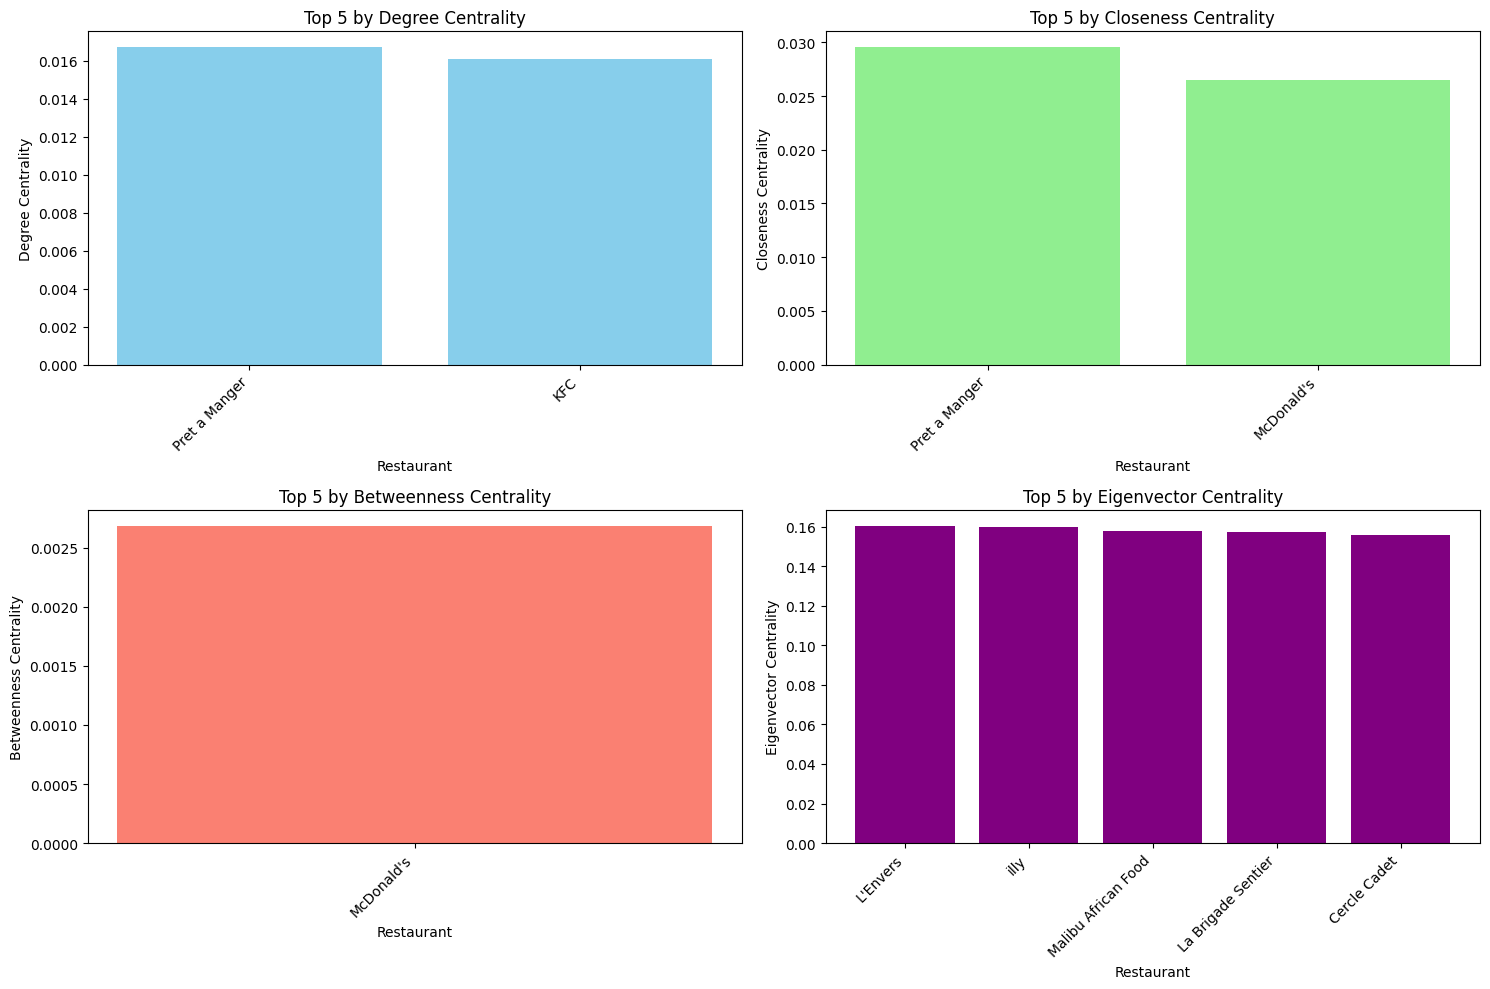

In [86]:
# Step 6: Visualize centrality scores (Matplotlib)
plt.figure(figsize=(15, 10))

# Degree centrality
plt.subplot(2, 2, 1)
plt.bar(top_degree['restaurant_name'], top_degree['degree_centrality'], color='skyblue')
plt.title('Top 5 by Degree Centrality')
plt.xlabel('Restaurant')
plt.ylabel('Degree Centrality')
plt.xticks(rotation=45, ha='right')

# Closeness centrality
plt.subplot(2, 2, 2)
plt.bar(top_closeness['restaurant_name'], top_closeness['closeness_centrality'], color='lightgreen')
plt.title('Top 5 by Closeness Centrality')
plt.xlabel('Restaurant')
plt.ylabel('Closeness Centrality')
plt.xticks(rotation=45, ha='right')

# Betweenness centrality
plt.subplot(2, 2, 3)
plt.bar(top_betweenness['restaurant_name'], top_betweenness['betweenness_centrality'], color='salmon')
plt.title('Top 5 by Betweenness Centrality')
plt.xlabel('Restaurant')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=45, ha='right')

# Eigenvector centrality
plt.subplot(2, 2, 4)
plt.bar(top_eigenvector['restaurant_name'], top_eigenvector['eigenvector_centrality'], color='purple')
plt.title('Top 5 by Eigenvector Centrality')
plt.xlabel('Restaurant')
plt.ylabel('Eigenvector Centrality')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('/kaggle/working/task4_bar_plots.png')
print("Bar plots saved to /kaggle/working/task4_bar_plots.png")


In [88]:
# Step 7: Visualize subgraph of top restaurants (PyVis)
top_nodes = set(top_degree['restaurant_name']).union(
    top_closeness['restaurant_name'],
    top_betweenness['restaurant_name'],
    top_eigenvector['restaurant_name']
)
G_top = G.subgraph(top_nodes)
print(f"Top restaurants subgraph: {G_top.number_of_nodes()} nodes, {G_top.number_of_edges()} edges")

# net = Network(notebook=True, height="500px", width="100%", directed=False, cdn_resources='in_line')
# net.from_nx(G_top)
# for node in G_top.nodes():
#     net.get_node(node)['label'] = node
#     net.get_node(node)['size'] = degree_centrality[node] * 1000
#     net.get_node(node)['title'] = (
#         f"{node}\nDegree: {degree_centrality[node]:.4f}\n"
#         f"Closeness: {closeness_centrality.get(node, 0):.4f}\n"
#         f"Betweenness: {betweenness_centrality.get(node, 0):.4f}\n"
#         f"Eigenvector: {eigenvector_centrality[node]:.4f}"
#     )
# for edge in G_top.edges(data=True):
#     net.get_edge(edge[0], edge[1])['value'] = edge[2]['weight']
#     net.get_edge(edge[0], edge[1])['title'] = f"Weight: {edge[2]['weight']:.2f}"

for u, v, data in G_sampled.edges(data=True):
    data['value'] = data.get('weight', 1)

# Now create the PyVis network from the modified graph
net = Network(notebook=True, height="500px", width="100%", directed=False, cdn_resources='in_line')
net.from_nx(G_sampled)

# Optional: Add labels to nodes
for node in G_sampled.nodes():
    net.get_node(node)['label'] = node


net.show_buttons(filter_=['physics'])
net.show("/kaggle/working/task4_top_restaurants.html")
print("Subgraph visualization saved to /kaggle/working/task4_top_restaurants.html")


Top restaurants subgraph: 8 nodes, 22 edges
/kaggle/working/task4_top_restaurants.html
Subgraph visualization saved to /kaggle/working/task4_top_restaurants.html


In [89]:
# Step 8: Save results
centrality_df.to_csv('/kaggle/working/task4_centrality.csv', index=False)
nx.write_gml(G, '/kaggle/working/task4_graph.gml')
print("Saved centrality analysis to /kaggle/working/task4_centrality.csv and graph to /kaggle/working/task4_graph.gml")

Saved centrality analysis to /kaggle/working/task4_centrality.csv and graph to /kaggle/working/task4_graph.gml
